In [1]:
import pyvisa
rm = pyvisa.ResourceManager()
inst = rm.open_resource("TCPIP0::192.168.2.110::gpib0,18::INSTR")
print(inst.query("*IDN?"))

"ADVANTEST,R3681,160400334,ES230  Jun 9 2006"



In [15]:
f_start = float(inst.query(":SENS:FREQ:START?"))
f_stop = float(inst.query(":SENS:FREQ:STOP?"))
ref_level = float(inst.query(":DISP:TRAC:Y:RLEVEL?"))
scale = float(inst.query(":DISP:TRAC:Y:PDIV?"))
scale_type = inst.query(":DISP:TRAC:Y:SPAC?")

print("Start:", f_start)
print("Stop:", f_stop)
print("Ref. Level:", ref_level) 
print("Scale:", scale)
print("Scale Type:", scale_type)

Start: 99950000.0
Stop: 100050000.0
Ref. Level: 20.0
Scale: 10.0
Scale Type: LOG



In [16]:
import numpy as np

inst.write(":FORM:TRAC REAL,32")
result = inst.query_binary_values(":TRAC:DATA? TRACE1", container=np.array)


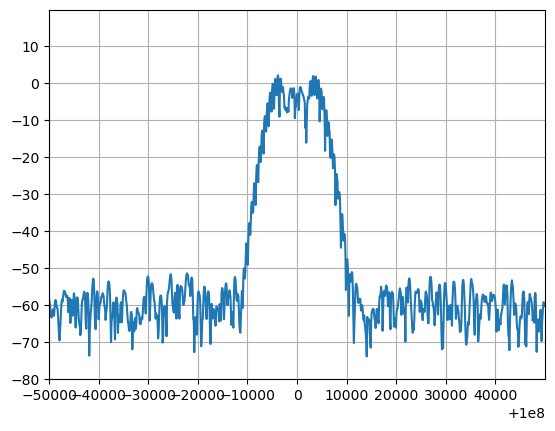

In [22]:
from matplotlib import pyplot as plt

freq = np.arange(f_start, f_stop, (f_stop-f_start)/len(result))

plt.axis([f_start, f_stop, ref_level-10*scale, ref_level])
plt.yticks(np.arange(ref_level-10*scale, ref_level, scale))
plt.xticks(np.arange(f_start, f_stop, (f_stop-f_start)/10))
plt.grid()
plt.plot(freq,result)
plt.show()
